<a href="https://colab.research.google.com/github/Abinav160701/ML_Projects/blob/master/LSTMtimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Flatten

In [4]:
# prepare independent features and dependent features
def prepare_data(timeseries_data, n_features):
    X, y = [], []
    for i in range(len(timeseries_data)):
        end_ix = i + n_features # 0->3, 1->4, 2->5, 
        if end_ix > len(timeseries_data) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [5]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [7]:
y

array([146, 158, 172, 187, 196, 210])

In [8]:
# reshape from [samples, timesptes] into [samples, timesteps, features]
n_features = 1
X = X.reshape(X.shape[0], X.shape[1], n_features)

In [10]:
X

array([[[110],
        [125],
        [133]],

       [[125],
        [133],
        [146]],

       [[133],
        [146],
        [158]],

       [[146],
        [158],
        [172]],

       [[158],
        [172],
        [187]],

       [[172],
        [187],
        [196]]])

In [14]:
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(n_steps,n_features)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit(X,y,epochs=300,verbose=0)

In [15]:
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
lst_output = []
i = 0
while(i<10):
    if (len(temp_input) > 3):
        x_input = np.array(temp_input[1:])
        # print(x_input)
        print("{} day input: {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output: {}".format(i, yhat[0][0]))
        print()
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.append(yhat[0][0])
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        # print(yhat.shape)
        # print(yhat[0][0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i = i + 1

1 day input: [196.         210.         226.35855103]
1 day output: 237.9235076904297

2 day input: [210.         226.35855103 237.92350769]
2 day output: 253.02464294433594

3 day input: [226.35855 237.92351 253.02464]
3 day output: 269.2685852050781

4 day input: [237.92351 253.02464 269.2686 ]
4 day output: 283.2525329589844

5 day input: [253.02464 269.2686  283.25253]
5 day output: 299.7648620605469

6 day input: [269.2686  283.25253 299.76486]
6 day output: 316.9514465332031

7 day input: [283.25253 299.76486 316.95145]
7 day output: 333.4373474121094

8 day input: [299.76486 316.95145 333.43735]
8 day output: 351.81329345703125

9 day input: [316.95145 333.43735 351.8133 ]
9 day output: 370.8123474121094



In [16]:
import matplotlib.pyplot as plt 

In [17]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [18]:
day_new = np.arange(1, 10)
day_pred = np.arange(10, 20)

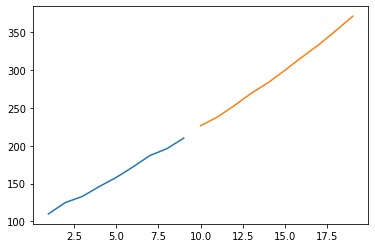

In [19]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)